In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from scipy.stats import f_oneway
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [2]:
calories = pd.read_csv("C:\\Users\\Elif Surucu\\Documents\\Flatiron\\Assesments\\Practice2\\Burn-to-fit\\Data\\calories.csv")
exercise = pd.read_csv("C:\\Users\\Elif Surucu\\Documents\\Flatiron\\Assesments\\Practice2\\Burn-to-fit\\Data\\exercise.csv")

In [3]:
print(calories.columns)
print(exercise.columns)

Index(['User_ID', 'Calories'], dtype='object')
Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')


In [4]:
merged_data = pd.merge(calories, exercise, on="User_ID", how="inner")
merged_data


,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...,...
14995,15644082,45.0,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,23.0,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,75.0,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,11.0,male,78,193.0,97.0,2.0,84.0,38.3


In [5]:
print(merged_data.isnull().sum())

User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64


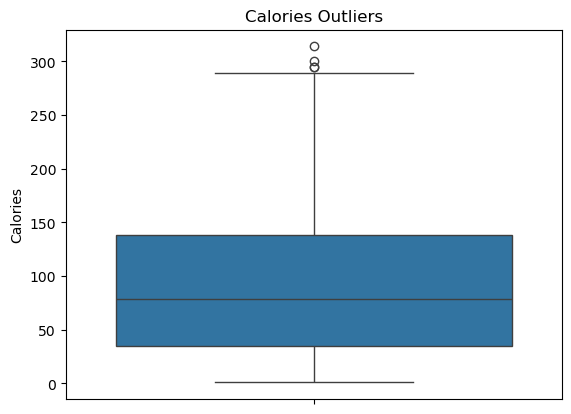

In [6]:
sns.boxplot(merged_data['Calories'])
plt.title("Calories Outliers")
plt.show()

In [7]:
merged_data.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [8]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


c:\Users\Elif Surucu\anaconda3\envs\Cohort_Env\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


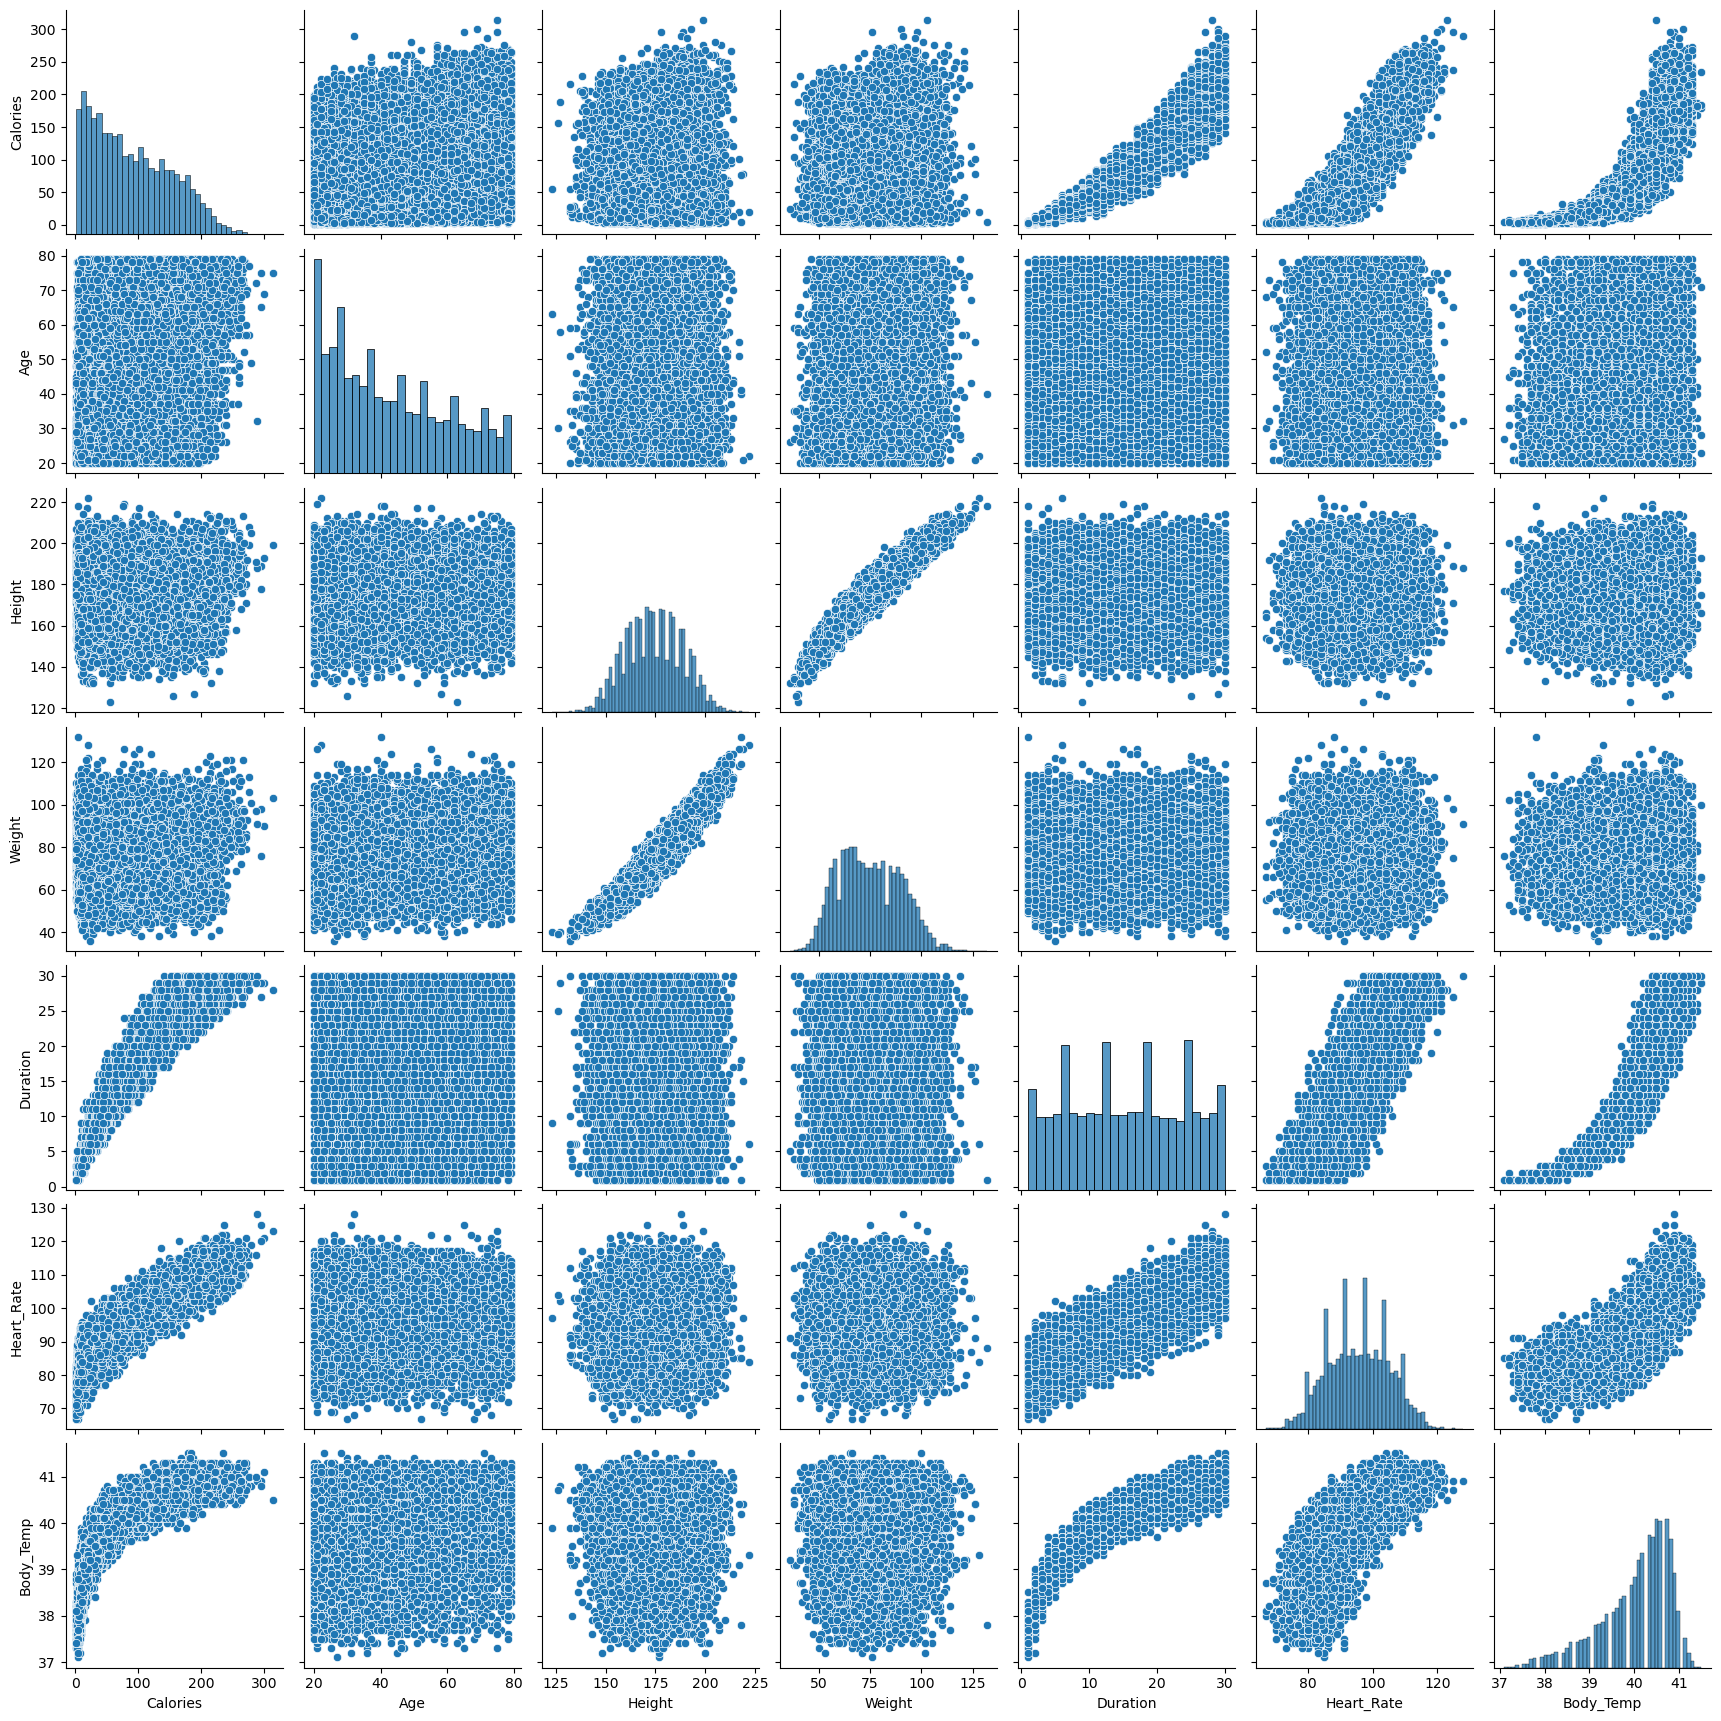

In [9]:
sns.pairplot(merged_data[['Calories', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']])
plt.show()

This summary highlights the key positive relationships observed in the data.
- Calories and Duration: Strong positive linear relationship.
- Calories and Weight: Higher weight, higher calories burned.
- Calories and Heart Rate: More calories burned, higher heart rate.
- Calories and Body Temperature: Higher calorie burn increases body temperature.


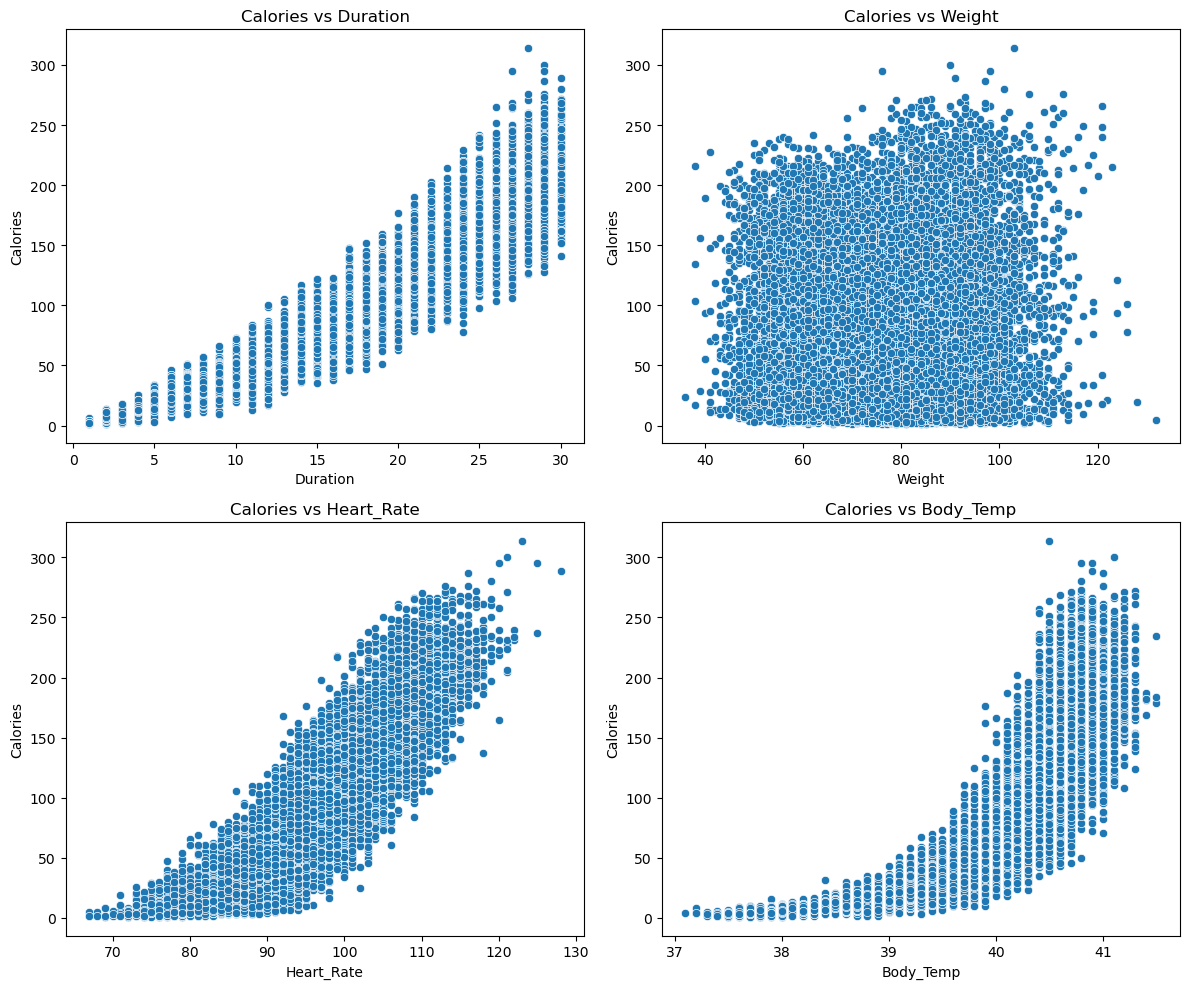

In [10]:
#To see more clearly, if i create scatter plots for Key correlations

key_variables = ['Duration', 'Weight', 'Heart_Rate', 'Body_Temp']
plt.figure(figsize=(12, 10))

for i, var in enumerate(key_variables, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=merged_data, x=var, y='Calories')
    plt.title(f'Calories vs {var}')

plt.tight_layout()
plt.show()

- Calories vs Duration: Strong linear increase; longer duration means more calories burned.
- Calories vs Weight: Dispersed relationship; calorie burn varies with weight.
- Calories vs Heart Rate: Positive trend; higher heart rate links to more calories burned.
- Calories vs Body Temperature: Upward trend; more calories burned raises body temperature.

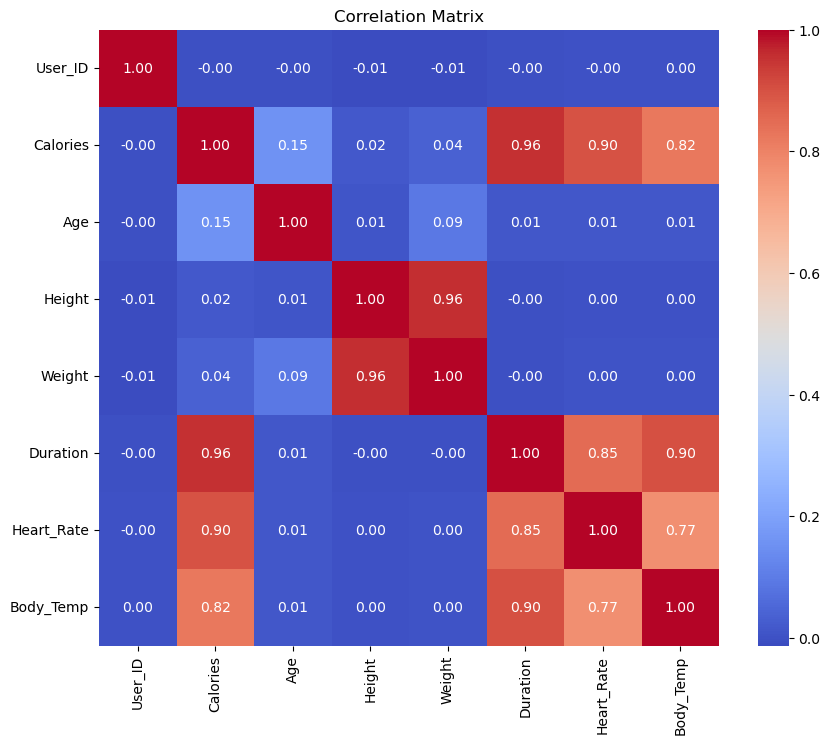

In [11]:

numeric_data = merged_data.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

X = merged_data[['Duration', 'Weight', 'Heart_Rate', 'Body_Temp']]
y = merged_data['Calories']

These relationships reveal that the most effective features in estimating calories are Duration, Heart_Rate and Body_Temp.

In [12]:
X = merged_data[['Duration', 'Heart_Rate', 'Body_Temp']]
y = merged_data['Calories']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Lineer Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [14]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [15]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"Linear Regression - MSE: {mse_linear}, R^2: {r2_linear}")


mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print(f"Decision Tree - MSE: {mse_tree}, R^2: {r2_tree}")

Linear Regression - MSE: 216.08235682070827, R^2: 0.9464584932015652
Decision Tree - MSE: 236.03238127384623, R^2: 0.9415152188611574


In [16]:
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
best_tree_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best MSE (negative):", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best MSE (negative): -170.24372946262957


I evaluated the performance of two different models and performed hyperparameter optimization for the decision tree model
- The linear regression model performed better with lower MSE and higher R² value.
- Best MSE score shown as negative: -170.24.

With this optimization, the performance of the decision tree model was improved.

In [17]:
y_pred_best_tree = best_tree_model.predict(X_test)


mse_best_tree = mean_squared_error(y_test, y_pred_best_tree)
r2_best_tree = r2_score(y_test, y_pred_best_tree)
print(f"Optimized Decision Tree - MSE: {mse_best_tree}, R^2: {r2_best_tree}")

Optimized Decision Tree - MSE: 178.1776056610672, R^2: 0.9558506412777306


The optimized decision tree model provides a lower error value compared to the previous MSE values, indicating that the performance of the model has improved.
These results show that the optimized decision tree model exhibits strong performance in predicting calories.

In [18]:
y_pred_best_tree = best_tree_model.predict(X_test)

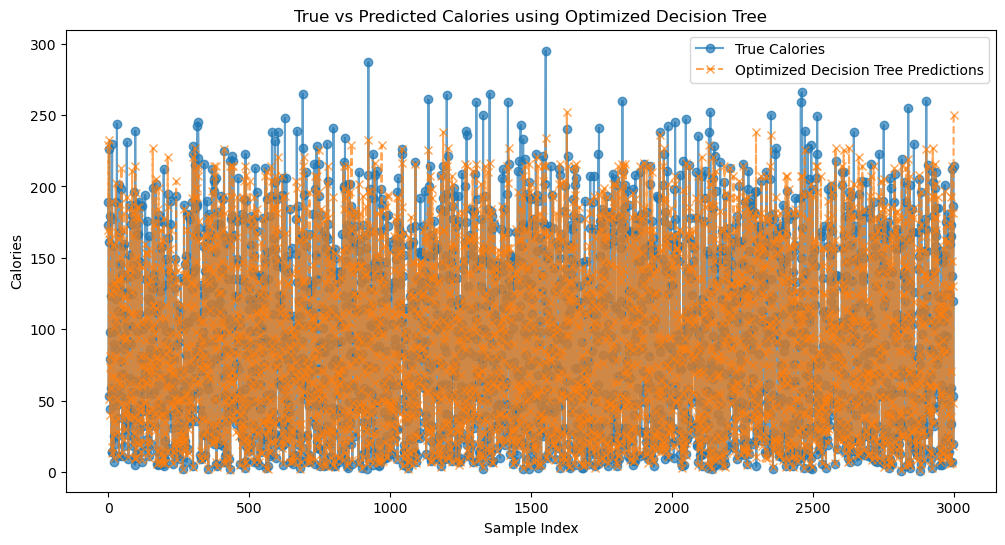

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='True Calories', marker='o', linestyle='-', alpha=0.7)
plt.plot(y_pred_best_tree, label='Optimized Decision Tree Predictions', marker='x', linestyle='--', alpha=0.7)
plt.legend()
plt.xlabel("Sample Index")
plt.ylabel("Calories")
plt.title("True vs Predicted Calories using Optimized Decision Tree")
plt.show()

At most points, the predictions are quite close to the true values, indicating that the model is performing well. There are some deviations, especially in high calorie values.


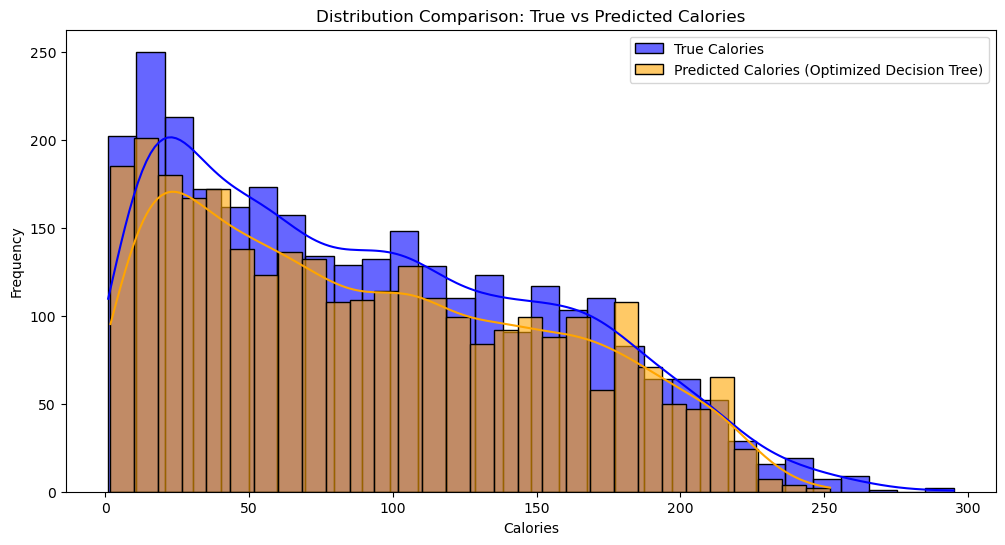

In [20]:
# Comparing the distributions of true and predicted calories

plt.figure(figsize=(12, 6))
sns.histplot(y_test, color="blue", label="True Calories", kde=True, bins=30, alpha=0.6)
sns.histplot(y_pred_best_tree, color="orange", label="Predicted Calories (Optimized Decision Tree)", kde=True, bins=30, alpha=0.6)
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.title("Distribution Comparison: True vs Predicted Calories")
plt.legend()
plt.show()

The distribution predicted by the model is generally consistent with the true distribution. The model shows a distribution close to the true values ​​at low calorie values.

We can add more features to improve the performance of the model.
Weight and Height can affect calories, as factors such as weight and height can affect energy expenditure and Age can have an effect on metabolic rate and therefore indirectly contribute to calorie burn.

In [21]:
X_new = merged_data[['Duration', 'Heart_Rate', 'Body_Temp', 'Weight', 'Height', 'Age']]
y = merged_data['Calories']


X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_new, y_train)


y_pred_rf = rf_model.predict(X_test_new)


mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf

(18.810694200000004, 0.9953390321810112)

It is observed that the added features significantly increase the performance of the model. With these features, the Random Forest Regressor model can predict calories quite accurately. At this stage, the model seems successful enough to be used in the project.